## Importing Libraries

In [6]:
# Uncomment if running on Google Colab
#!pip install mne gdown

import mne
import scipy.io
import numpy as np
import pathlib
import gdown
import zipfile

## Downloading the zipped data file from Google Drive

In [7]:
cwd = pathlib.Path.cwd()

# Download zip file, if data folder doesn't exist
if not ((cwd/'data.zip').exists() or ((cwd/'data').exists and (cwd/'data').is_dir())):
    url = 'https://drive.google.com/file/d/1y5r8yVxDHqvHck1hsX6TIjnXRpOTP4RE/view?usp=sharing'
    output = 'data.zip'
    gdown.download(url, output, fuzzy=True)


# Extract zip file to the current working directory
if not ((cwd/'data').exists and (cwd/'data').is_dir()):
    with zipfile.ZipFile(cwd/'data.zip', 'r') as zip_ref:
        zip_ref.extractall(cwd)

    # Delete zip file
    (cwd/'data.zip').unlink()

Downloading...
From (original): https://drive.google.com/uc?id=1y5r8yVxDHqvHck1hsX6TIjnXRpOTP4RE
From (redirected): https://drive.google.com/uc?id=1y5r8yVxDHqvHck1hsX6TIjnXRpOTP4RE&confirm=t&uuid=1ded4ca2-9deb-439b-ad5a-feff66ac472d
To: /Users/aaronnezzer/Documents/GitHub/BCI_Project/data.zip
100%|██████████| 414M/414M [00:39<00:00, 10.3MB/s] 


## Importing data

In [8]:
# Get an array of file paths of each subject
directory = pathlib.Path('data')
files = directory.glob('*.mat')
file_paths = sorted([file for file in files if file.is_file()])

## Processing Matlab data to Python data object

In [9]:
def process_mat_file(file_path):
    mat = scipy.io.loadmat(file_path)

    chann = np.array([mat['chann'][0][i][0] for i in range(len(mat['chann'][0]))])
    X = mat['X']
    I = mat['I']
    Y = mat['Y']

    id_lab = np.array([mat['id_lab'][0][i][0] for i in range(len(mat['id_lab'][0]))])

    return {'X': X, 'Y': Y, 'id_lab': id_lab, 'chann': chann, 'I': I}

# Example to obtain processed data from a file
# data = process_mat_file('data/S00.mat')
data.keys()

NameError: name 'data' is not defined

## Process data for ERP analysis

## Creating Epochs

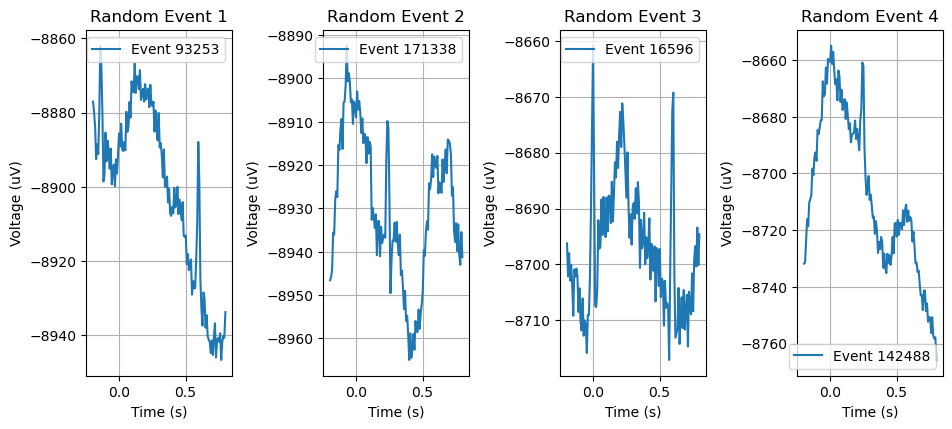

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load data from the file S00.mat
mat_data = scipy.io.loadmat('data/S00.mat')

# Extract the EEG data X, Y, and I
X = mat_data['X']
Y = mat_data['Y'][0]
I = mat_data['I'][0]

# Define the event codes (Y values) for ERPs
event_codes = [2, 3]

# Set values in Y outside the event codes to 0
Y_events = np.where(np.isin(Y, event_codes), Y, 0)

# Find the indices where Y equals the event codes
event_indices = np.where(Y_events > 0)[0]

# Define the time window around each event (in seconds)
time_window_before = 0.2  # 200 milliseconds before event
time_window_after = 0.8   # 800 milliseconds after event

# Calculate the average EEG across all channels
average_eeg = np.mean(X, axis=0)

# Set the number of random plots
num_plots = 4

# Create subplots for each random event
plt.figure(figsize=(12, 8))
for i in range(num_plots):
    # Randomly select an index for plotting
    random_index = np.random.choice(event_indices, 1, replace=False)[0]
    
    # Extract the EEG readings (X) for the random event within the time window using the average EEG
    window_start = I[random_index] - time_window_before
    window_end = I[random_index] + time_window_after
    window_indices = np.where((I >= window_start) & (I <= window_end))[0]
    random_event_eeg = average_eeg[window_indices]
    
    # Calculate the time points for the ERP waveform
    time_points = np.linspace(-time_window_before, time_window_after, len(random_event_eeg))
    
    # Plot the single random event with Average EEG Data
    plt.subplot(2, 5, i+1)  # Create a 2x5 grid of subplots
    plt.plot(time_points, random_event_eeg, label=f'Event {random_index}')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (uV)')
    plt.title(f'Random Event {i+1}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
## Changes After Event (Experimental, Delete if irrelevant)

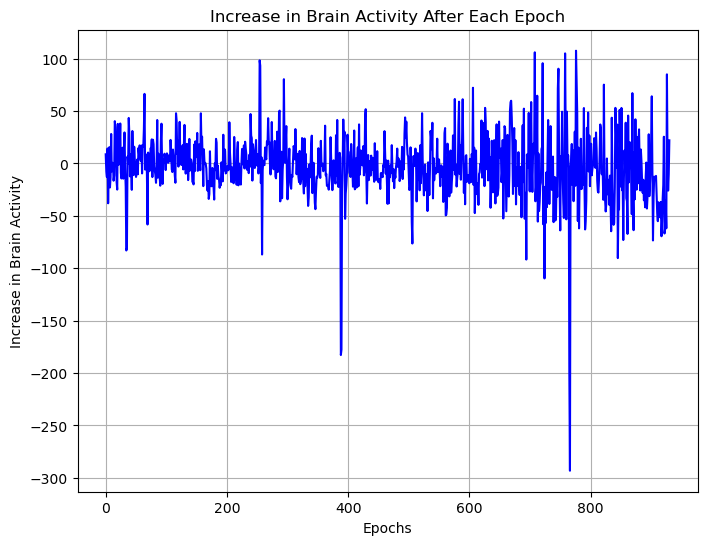

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load data from the file S00.mat
mat_data = scipy.io.loadmat('data/S00.mat')

# Extract the EEG data X, Y, and I
X = mat_data['X']
Y = mat_data['Y'][0]
I = mat_data['I'][0]

# Define the event codes (Y values) for ERPs
event_codes = [2, 3]

# Set values in Y outside the event codes to 0
Y_events = np.where(np.isin(Y, event_codes), Y, 0)

# Find the indices where Y equals the event codes
event_indices = np.where(Y_events > 0)[0]

# Define the time window around each event (in seconds)
time_window_before = 0.2  # 200 milliseconds before event
time_window_after = 0.8   # 800 milliseconds after event

# Calculate the average EEG across all channels
average_eeg = np.mean(X, axis=0)

# Initialize arrays to store the increase in brain activity and average EEG data
increase_activity = []
average_eeg_values = []

# Calculate increase in brain activity for each event
for event_index in event_indices:
    # Calculate the time range around the event
    event_time = I[event_index]
    window_start = event_time - time_window_before
    window_end = event_time + time_window_after
    
    # Find the indices within the time window
    window_indices = np.where((I >= window_start) & (I <= window_end))[0]
    
    # Calculate the average EEG before the event
    average_before = np.mean(average_eeg[window_indices[:int(len(window_indices)/2)]])
    
    # Calculate the average EEG after the event
    average_after = np.mean(average_eeg[window_indices[int(len(window_indices)/2):]])
    
    # Calculate the increase in brain activity
    increase = average_after - average_before
    
    # Append the increase in brain activity to the array
    increase_activity.append(increase)
    
    # Append the average EEG value to the array
    average_eeg_values.append(average_after)

# Convert the lists to numpy arrays
increase_activity = np.array(increase_activity)
average_eeg_values = np.array(average_eeg_values)

# Calculate the time points for the increase in brain activity
time_points = np.arange(len(increase_activity))

# Plot the increase in brain activity
plt.figure(figsize=(8, 6))
plt.plot(time_points, increase_activity, label='Increase in Brain Activity', linestyle='-', marker='', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Increase in Brain Activity')
plt.title('Increase in Brain Activity After Each Epoch')
plt.grid(True)
plt.show()



## Changed event to screen freeze

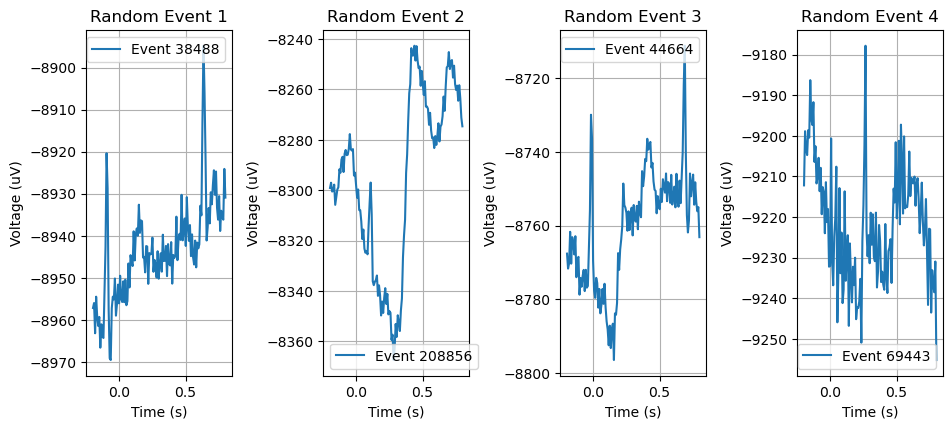

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load data from the file S00.mat
mat_data = scipy.io.loadmat('data/S00.mat')

# Extract the EEG data X, Y, and I
X = mat_data['X']
Y = mat_data['Y'][0]
I = mat_data['I'][0]

# Define the event codes (Y values) for ERPs
event_codes = [5]

# Set values in Y outside the event codes to 0
Y_events = np.where(np.isin(Y, event_codes), Y, 0)

# Find the indices where Y equals the event codes
event_indices = np.where(Y_events > 0)[0]

# Define the time window around each event (in seconds)
time_window_before = 0.2  # 200 milliseconds before event
time_window_after = 0.8   # 800 milliseconds after event

# Calculate the average EEG across all channels
average_eeg = np.mean(X, axis=0)

# Set the number of random plots
num_plots = 4

# Create subplots for each random event
plt.figure(figsize=(12, 8))
for i in range(num_plots):
    # Randomly select an index for plotting
    random_index = np.random.choice(event_indices, 1, replace=False)[0]
    
    # Extract the EEG readings (X) for the random event within the time window using the average EEG
    window_start = I[random_index] - time_window_before
    window_end = I[random_index] + time_window_after
    window_indices = np.where((I >= window_start) & (I <= window_end))[0]
    random_event_eeg = average_eeg[window_indices]
    
    # Calculate the time points for the ERP waveform
    time_points = np.linspace(-time_window_before, time_window_after, len(random_event_eeg))
    
    # Plot the single random event with Average EEG Data
    plt.subplot(2, 5, i+1)  # Create a 2x5 grid of subplots
    plt.plot(time_points, random_event_eeg, label=f'Event {random_index}')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (uV)')
    plt.title(f'Random Event {i+1}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()